In [1]:
import keras
import numpy as np
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

%matplotlib inline



Using TensorFlow backend.


In [2]:
batch_size=128
num_classes=10
epochs=2
#input shape of data
img_rows,img_cols=28,28

In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)





### Preprocessing the data

In [4]:
x_train.dtype

dtype('uint8')

In [5]:
x_train=x_train.astype('float32')

In [6]:
x_test=x_test.astype('float32')
x_test[1:10]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [7]:
x_train/=255
x_test/=255


In [8]:
print("shape of x_train",x_train.shape)
print("shape of x_test",x_test.shape)

shape of x_train (60000, 28, 28, 1)
shape of x_test (10000, 28, 28, 1)


In [9]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

## building the network

In [10]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


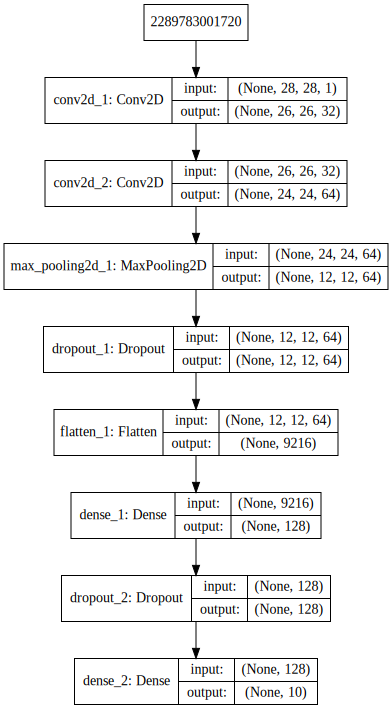

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))


In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])
model.fit(x_train,y_train,
          batch_size=128,
          epochs=2,
         verbose=1,
         validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 163s 3ms/step - loss: 0.2635 - acc: 0.9180 - val_loss: 0.0568 - val_acc: 0.9811
Epoch 2/2
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0885 - acc: 0.9746 - val_loss: 0.0463 - val_acc: 0.9845


In [13]:
score=model.evaluate(x_test,y_test,verbose=1)

10000/10000 [==============================] - 10s 973us/step


In [14]:
print("test loss %",score[0])
print("test accuracy %",score[1])

test loss % 0.04631725007372443
test accuracy % 0.9845


### Prepare image for cnn

In [20]:
test_image=np.expand_dims(x_test[9],axis=3)
test_image=test_image.reshape(1,img_rows,img_cols,1)

### Sample Handwritten digit

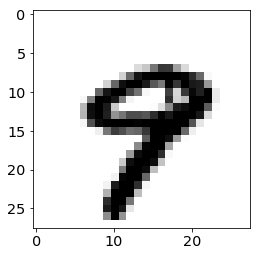

In [21]:
plt.imshow(x_test[9][:,:,0],cmap=plt.get_cmap('binary'))

In [22]:
model.predict_classes(test_image,batch_size=1)

array([9], dtype=int64)

### testing own data

In [26]:
import cv2
im=cv2.imread("testing.jpeg")
type(im)

numpy.ndarray

In [28]:
x_train/=255
x_test/=255
test_image=np.expand_dims(im,axis=3)
test_image=test_image.reshape(1,img_rows,img_cols,1)

ValueError: cannot reshape array of size 2352 into shape (1,28,28,1)